# 💡 Understanding the Data

X (Featuers)
1. Metadata A + B = Socio Demographics Information (Quantitative + Categorical)
- -  A mix of categorical and numerical features (e.g., handedness, education level, parenting info, emotions).
2. Functional MRI Matrices (represents functional connectivity between different brain regions)

- Rows = Participants (Each row corresponds to one subject).
- Columns = Brain Region Pairs (Each value represents the functional connection strength between two regions).
- It is a 199 x 199 symmetric matrix, flattened into a single row per participant.

Combine these 3 for EDA and Model Training.

---

Y  (Output)
- There are 2 targets
 1. ADHD diagnosis (0- None, 1- ADHD)
 2. Sex_F (0- Male, 1 - Female)

- LABELS: ADHD diagnosis and sex.

---

Others

- Instrument_Description - Description about the types of Tests taken.
- EHQ – Edinburgh Handedness Questionnaire
- APQ –Alabama Parenting Questionnaire
- SDQ – Strength and Difficulties Questionnaire.

I believe these things are for knowledge and may be useful for features development and understanding.

---

The fMRI department has collected functional brain imaging data of
children and adolescents which are available to you together with their socio-demographic, emotions, and parenting information.

As there might be gender-based differences, the task is to build a model to **predict both an
individual’s sex and their ADHD diagnosis**  using this information.

---
Your task is to predict both ADHD diagnosis and sex using functional MRI data and socio-demographic information while ensuring the model is not biased, especially against female patients.

---

# 📌  Exploratory Data Analysis (EDA)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install umap-learn

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier

## 1️⃣ Deeper Understanding of Data



✅ Steps:

- Load the dataset (CSV and Excel).
- Check the data structure: Number of rows & columns (df.shape).
- Inspect column names & data types (df.info()).
- Check the first few rows (df.head()).

### MetaData A

In [4]:
# For Metadata A (Quantitative)
metadata_a = pd.read_excel("METADATA_A.xlsx")
metadata_a.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [5]:
print(metadata_a.shape)  # Rows & Columns (1213, 19)
print(metadata_a.isnull().sum()) # missing Values

(1213, 19)
participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [6]:
print(metadata_a.info())  # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [7]:
print(metadata_a.describe()) # Summary

       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       58.876917             13.164880        3.781533       13.205276   
std        49.855501              2.780624        1.376700        3.811772   
min      -100.000000              0.000000        0.000000        0.000000   
25%        45.600000             14.000000        3.000000       11.000000   
50%        76.670000             14.000000        3.000000       13.000000   
75%        93.400000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count      1213.000000      1213.000000     1213.000000     1213.000000   
mean         39.374279        17.785655       16.393240       25.246496   
std           6.245928         3.764112        5.376994        3.950529 

In [8]:
# Check missing values across all columns
missing_values_a = metadata_a.isnull().sum()

missing_columns_a  = missing_values_a[missing_values_a > 0].index
missing_records_dfa = metadata_a[metadata_a[missing_columns_a].isnull().any(axis=1)]

missing_records_dfa.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
5,tBGXkEdv2cp7,83.34,2,5,12,35,16,15,21,4,17,0,12,9,8,5,5,3,NaN
11,6fpygdQTScAW,66.74,13,5,15,40,15,20,25,2,4,0,4,0,2,0,0,10,NaN


### Metadata B

In [9]:
# For Metadata B  (Categorical)
metadata_b = pd.read_excel("METADATA_B.xlsx")
metadata_b.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [10]:
print(metadata_b.shape)  # Rows & Columns (1213, 10)
print(metadata_b.isnull().sum()) # missing Values

(1213, 10)
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [11]:
print(metadata_b.info())  # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB
None


In [12]:
print(metadata_b.describe()) # Summary

       Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count              1213.000000             1213.000000   
mean               2017.652102                2.014839   
std                   1.122522                1.135147   
min                2015.000000                1.000000   
25%                2017.000000                1.000000   
50%                2018.000000                1.000000   
75%                2019.000000                3.000000   
max                2020.000000                4.000000   

       PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
count                       1202.000000                  1213.000000   
mean                           0.424293                     2.080791   
std                            0.687470                     3.164636   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                            0.000000      

In [13]:
# Check missing values across all columns
missing_values_b = metadata_b.isnull().sum()

missing_columns_b  = missing_values_b[missing_values_b > 0].index
missing_records_dfb = metadata_b[metadata_b[missing_columns_b].isnull().any(axis=1)]

missing_records_dfb.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
50,r44YD9eIqJ9u,2016,3,NaN,0,1,21,40,21,0
54,VZnIq2hRErI5,2017,1,NaN,0,2,21,25,18,15
103,cI2963FmxJti,2018,3,NaN,4,3,21,45,18,45
122,SZxlsOgwVT6D,2016,1,NaN,0,1,21,45,12,20
196,LPWm6w5QXeev,2016,1,NaN,0,1,6,0,0,0


### FUNCTIONAL_CONNECTOME_MATRICES

In [14]:
# For Functional MRI Matrices
fmri_matrices = pd.read_csv("FUNCTIONAL_CONNECTOME_MATRICES.csv")
fmri_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [15]:
print(fmri_matrices.shape)  # Rows & Columns (1213, 19901)
print(fmri_matrices.isnull().sum()) # missing Values

(1213, 19901)
participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [16]:
print(fmri_matrices.info())  # Data types
# print(fmri_matrices.describe()) # Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
None


In [17]:
missing_values = fmri_matrices.isnull().sum()
missing_values[missing_values > 0]

,0


In [18]:
# Check missing values across all columns
missing_columns  = missing_values[missing_values > 0].index
missing_records_df = fmri_matrices[fmri_matrices[missing_columns].isnull().any(axis=1)]

missing_records_df.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn


In [19]:
print(f"Total rows with missing values: {missing_records_df.shape[0]}") # apXT1ZuI5FLx or jA5iwa9nh8ed

Total rows with missing values: 0


In [20]:
fmri_matrices[fmri_matrices["participant_id"] == "jA5iwa9nh8ed"]

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
80,jA5iwa9nh8ed,0.015019,0.171298,-0.007866,0.026381,0.033539,0.121241,0.123,0.080267,-0.012299,...,0.151905,-0.073514,-0.041812,0.067893,0.027103,0.049518,0.097233,0.163616,0.094943,0.138194


### Labels

In [21]:
targets = pd.read_excel("LABELS.xlsx")
targets.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [22]:
print(targets.shape)  # Rows & Columns (1213, 3)
print(targets.isnull().sum()) # missing Values

(1213, 3)
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64


In [23]:
print(targets.describe())

       ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000


In [24]:
print(targets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB
None


💡Insights (Missing Values)
- METADATA A  (1213, 19)- MRI_Track_Age_at_Scan - 360
- METADATA B  (1213, 10)- PreInt_Demos_Fam_Child_Ethnicity - 11
- fmri_matrices (1213, 19901) - No record has missing Values
- targets (1213, 3) - No missing values.

- Total Features = 18+9+19900 = 19927 (not including participant_id)
---

In [25]:
metadata_a.duplicated().sum()

0

In [26]:
metadata_b.duplicated().sum()

0

In [27]:
fmri_matrices.duplicated().sum()

0

In [28]:
targets.duplicated().sum()

0

## 2️⃣ Feature Understanding & Exploration


### 📊 For labels.

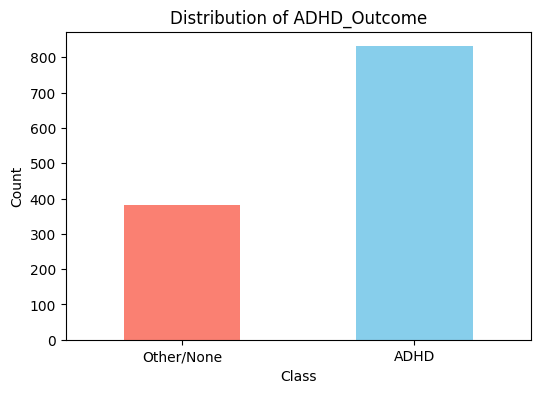

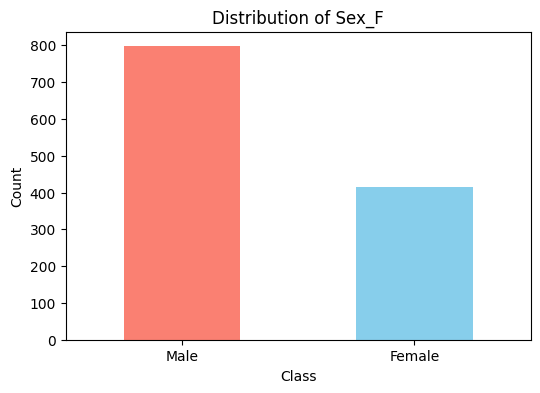

In [29]:
columns_to_plot = ["ADHD_Outcome", "Sex_F"]

xtick_labels = {
    "ADHD_Outcome": {0: "Other/None", 1: "ADHD"},
    "Sex_F": {0: "Male", 1: "Female"}
}

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    targets[col].value_counts().sort_index().plot(kind='bar', color=['salmon', 'skyblue'])
    plt.title(f"Distribution of {col}")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=xtick_labels[col].values(), rotation=0)
    plt.show()

💡The distribution are not equal for both ADHD and Sex columns.
- Data regarding the ADHD is positive is 2x that of not having ADHD.
- In terms of sex 2x the Male data is collected than that of female.

More data should be collected or existing data should be discared until distribution is equal for the model to train. Training with such proportion could introduce bias to the model.

### 📊 For numerical variables:

- Histograms for quantative metadata A.
- HeatMap for feature Selection.

In [30]:
metadata_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

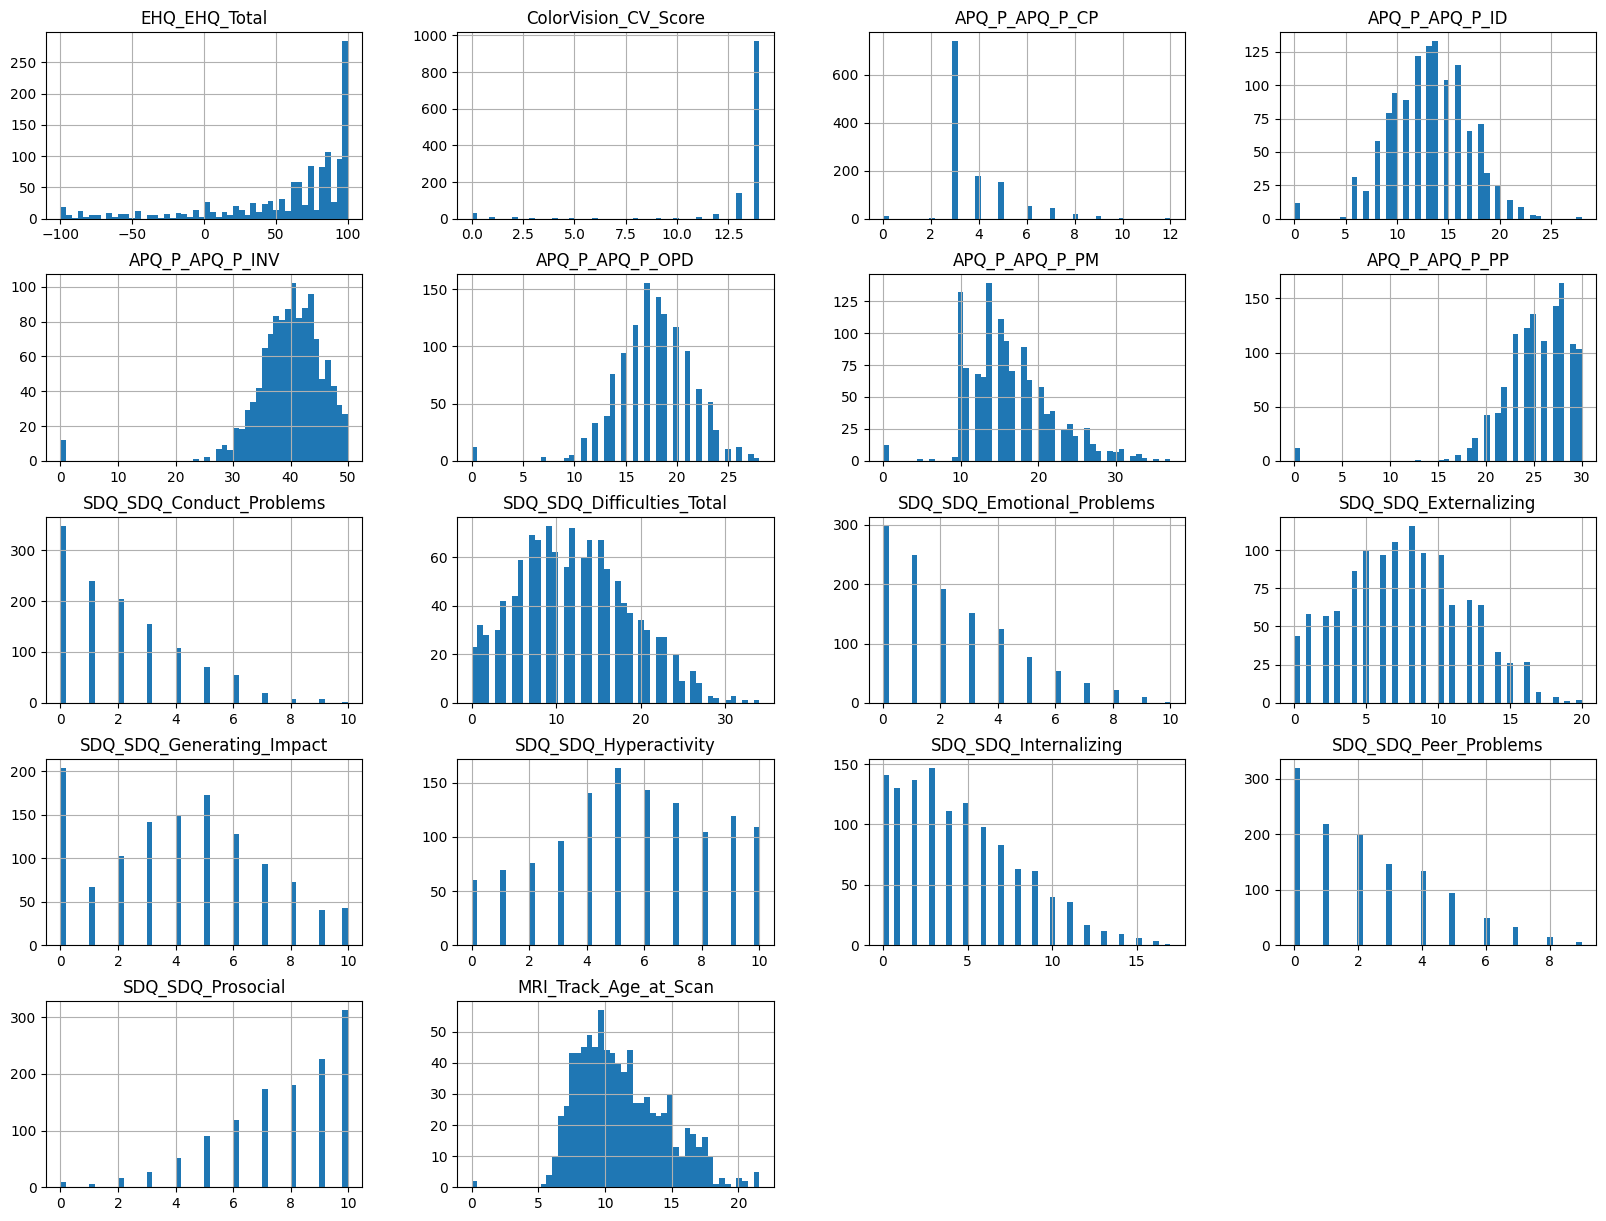

In [31]:
# Plot the histogram for metadat_a
_ = metadata_a.hist(bins=50, figsize=(20,15))


💡Skewed Distributions (Ask for feedback)

Left Skewed: EHQ, ColorVision, APQ_INV, APQ_PP, SDQ_Prosocial

Right Skewed: APQ_C, APQ_P_PM, Conduct Problems, Emotional Problem, SDQ_Internalizing and Peer Problems

Others are somewhat normally distributed.

According to the feature description, most of the features here are in scale. So, they apper in category-like.

May apply skwe transformation like
- Log
- Square Root
- Box-Cox
- Yeo-Johnson
- Quantile Transformations


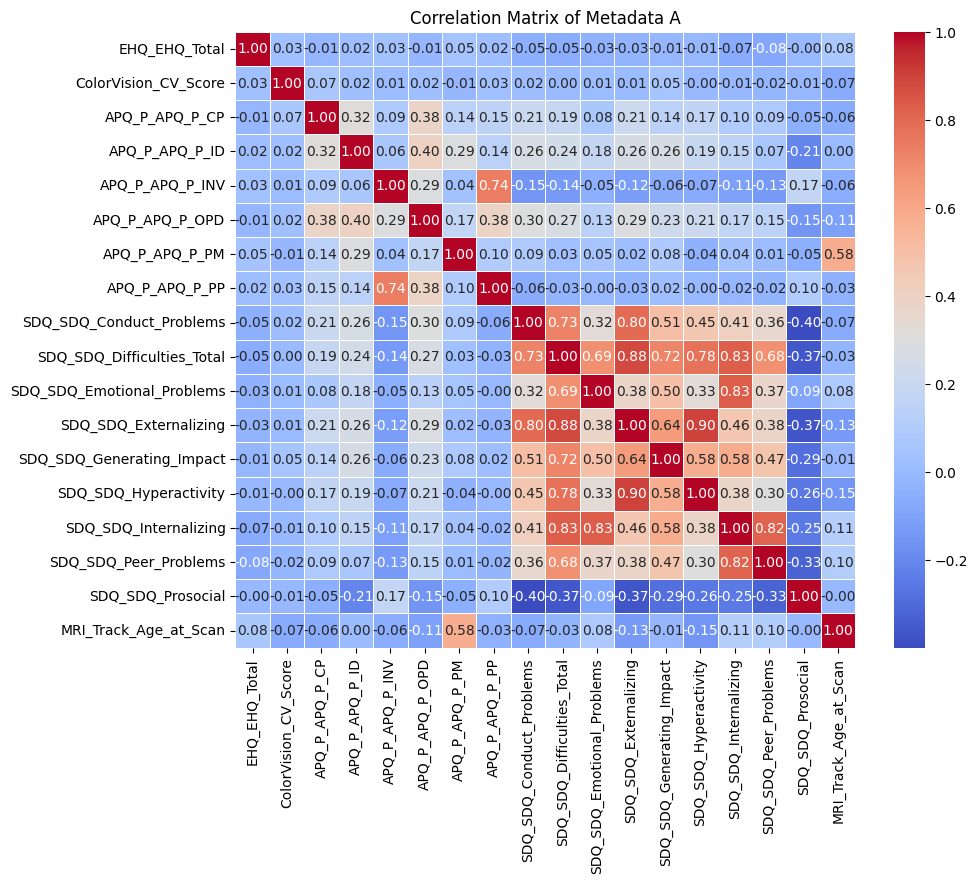

In [32]:
# Correlation matrix
numerical_metadata_a = metadata_a.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_metadata_a.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Metadata A")
plt.show()


In [33]:
corr_matrix = numerical_metadata_a.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Extracts the upper triangle of the matrix (including the diagonal).
high_corr_pairs = corr_matrix.where(mask).stack().reset_index() # Remove the null values and change to df

# Filter pairs with correlation higher than 0.8 or lower than -0.8
high_corr_pairs = high_corr_pairs[(high_corr_pairs[0] > 0.8) | (high_corr_pairs[0] < -0.8)]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] != 1.0] # dont include the diagonal ones as they are 1

high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr_pairs)

                      Feature 1              Feature 2  Correlation
128  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Externalizing     0.880004
131  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Internalizing     0.826949
139  SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Internalizing     0.833418
145       SDQ_SDQ_Externalizing  SDQ_SDQ_Hyperactivity     0.901635
162       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems     0.819531


💡Numerical Feature Selection
- SDQ_SDQ_Externalizing and SDQ_SDQ_Internalizing are score which represents Problems and Emotions they they feel/show to the world. These problems and emotions are already detailed documented in terms of SDQ_SDQ_Difficulties_Total, SDQ_SDQ_Emotional_Problems, SDQ_SDQ_Hyperactivity and SDQ_SDQ_Peer_Problems.


Since, these details are more documented in them, i believe internalizing and externalizing can be removed.

In [34]:
metadata_a = metadata_a.drop(columns=['SDQ_SDQ_Internalizing', 'SDQ_SDQ_Externalizing'])
metadata_a.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,0,5,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,7,8,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,5,7,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,9,10,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,4,10,3,9,8.940679


### 📊 For categorical variables:

- Plotting Bar plots for the features except participant_id as it is unique.
- Do some Grouping for the model traning based on feature knowledge.

- As it is a mixture of ordinal (rank) and nominal data, box plot is not good because the distribution can be seen exactly from the bar (count) box.

- If it is only ordinal (rank), box plot is good.

In [35]:
metadata_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


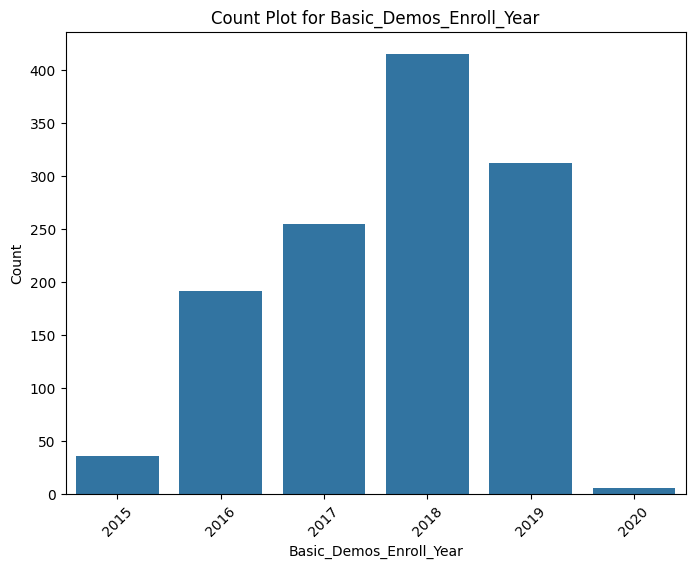

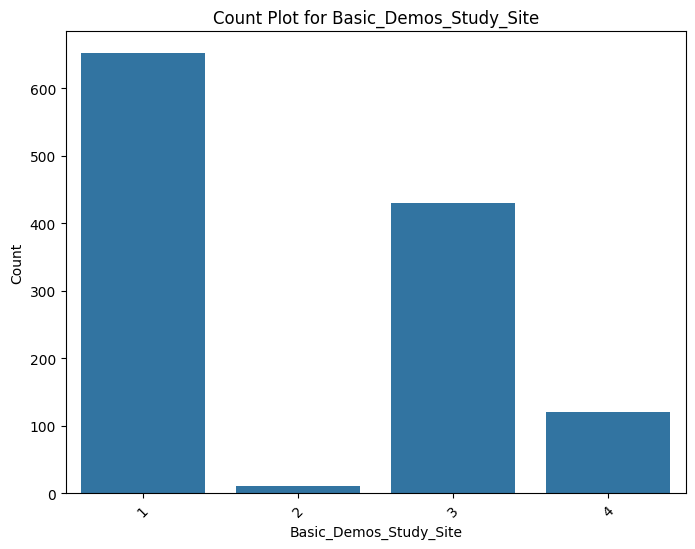

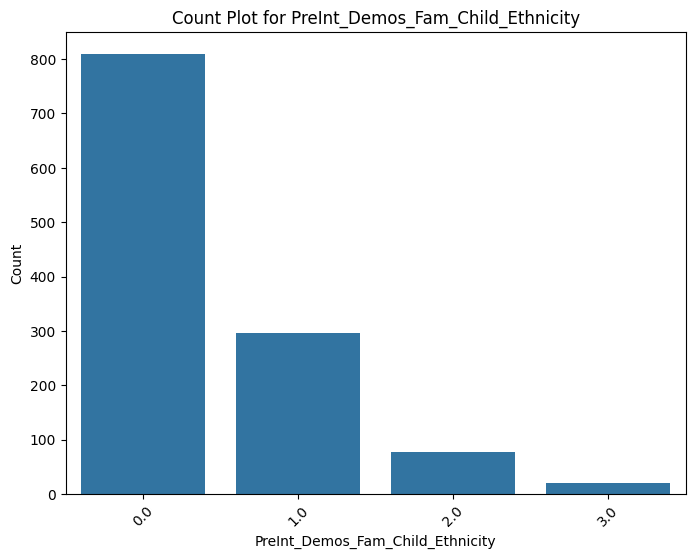

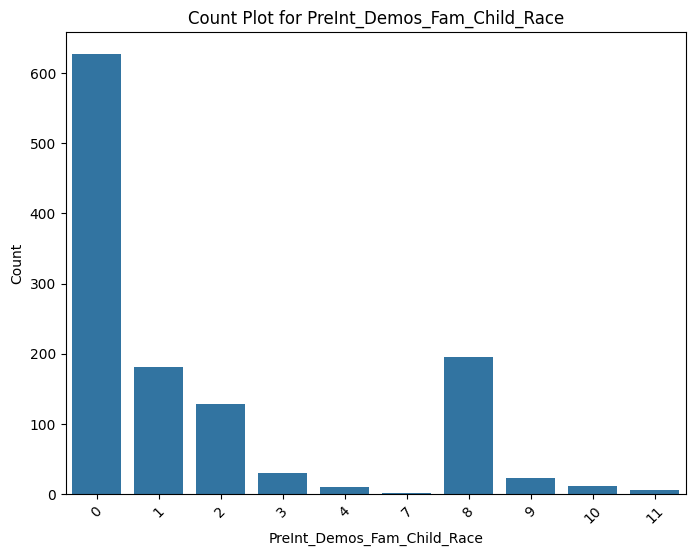

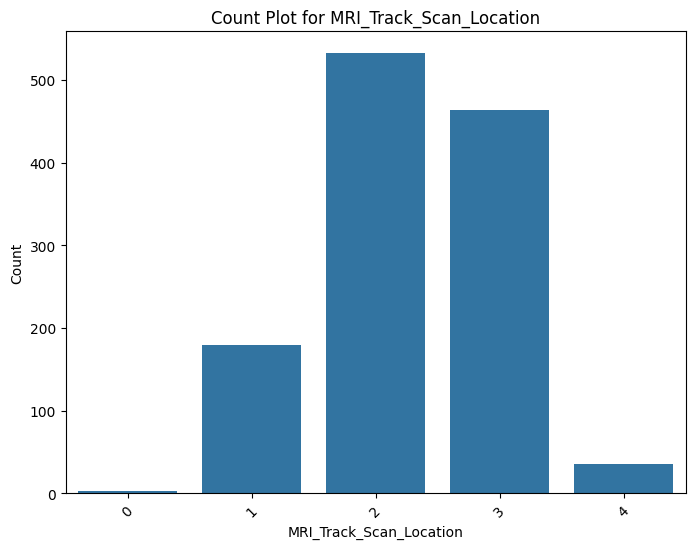

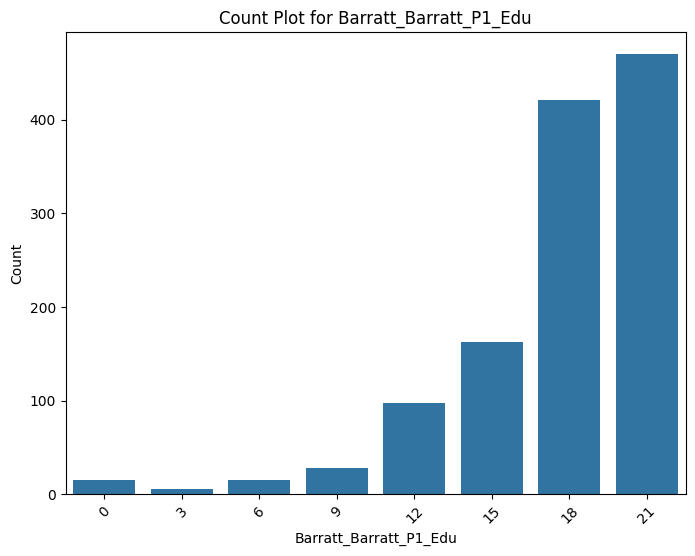

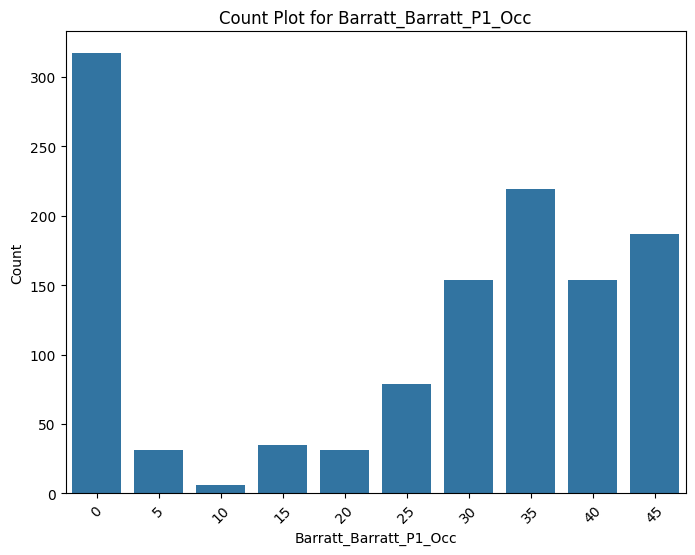

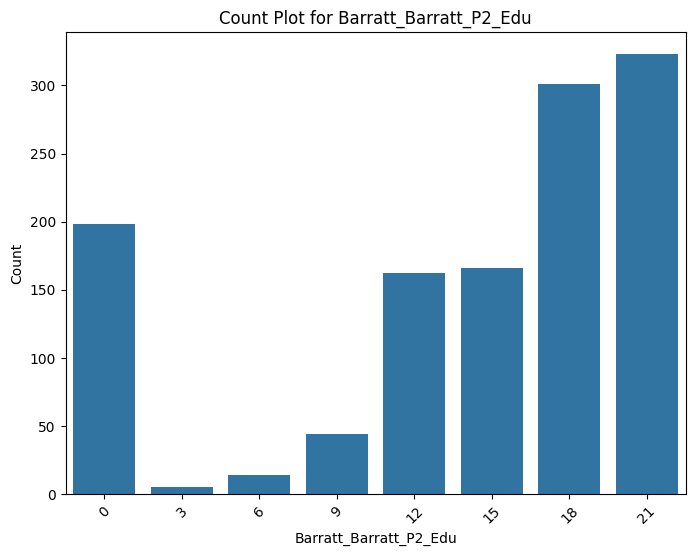

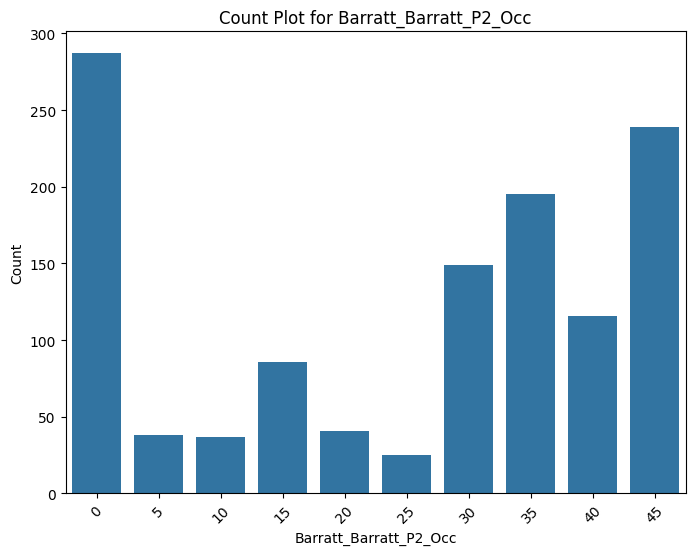

In [36]:
# Bar plots (count plots) for each categorical column
categorical_cols = [col for col in metadata_b.columns if col != 'participant_id']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=metadata_b[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

💡Classes are not in good ratios. These are not good for model training.
- These things can be grouped to reduce the imbalance ratio.

- - Study site, Ethnicity, Race and Scan Location have meaning of their own. They cant be grouped to have a same meaning.
- - Others can be Grouped becasue after grouping, they still represent original meaning.

In [37]:
def group_year(value):
    if value in [2015,2016]:
        return 1
    elif value == 2017:
        return 2
    elif value == 2018:
        return 3
    elif value in [2019,2020]:
        return 4
    else:
        return value  # Keep any unexpected values as they are

metadata_b["Basic_Demos_Enroll_Year"] = metadata_b["Basic_Demos_Enroll_Year"].apply(group_year)


In [38]:
def group_education(value):
    if value in [0, 3, 6, 9, 12]:
        return 1
    elif value == 15:
        return 2
    elif value == 18:
        return 3
    elif value == 21:
        return 4
    else:
        return value  # Keep any unexpected values as they are

metadata_b["Barratt_Barratt_P1_Edu"] = metadata_b["Barratt_Barratt_P1_Edu"].apply(group_education)
metadata_b["Barratt_Barratt_P2_Edu"] = metadata_b["Barratt_Barratt_P2_Edu"].apply(group_education)


In [39]:
def group_occ(value):
    if value == 0:
        return 1
    elif value in [5, 10, 15, 20, 25]:
        return 2
    elif value == 30:
        return 3
    elif value == 35:
        return 4
    elif value == 40:
        return 5
    elif value == 45:
        return 6
    else:
        return value  # Keep any unexpected values as they are

metadata_b["Barratt_Barratt_P1_Occ"] = metadata_b["Barratt_Barratt_P1_Occ"].apply(group_occ)
metadata_b["Barratt_Barratt_P2_Occ"] = metadata_b["Barratt_Barratt_P2_Occ"].apply(group_occ)

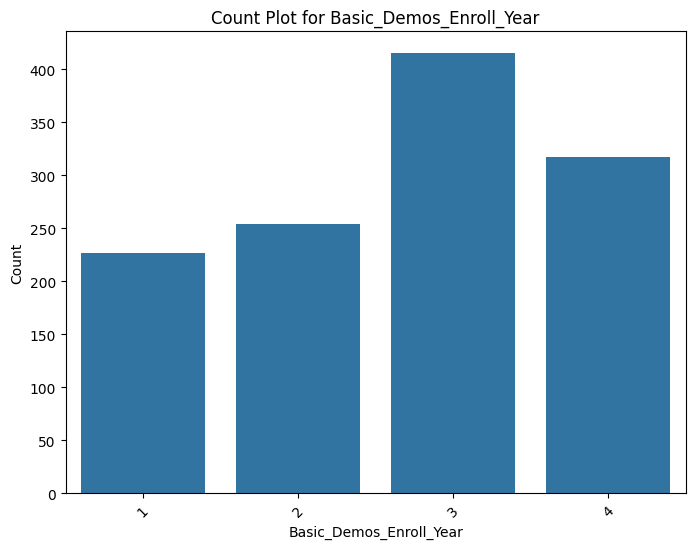

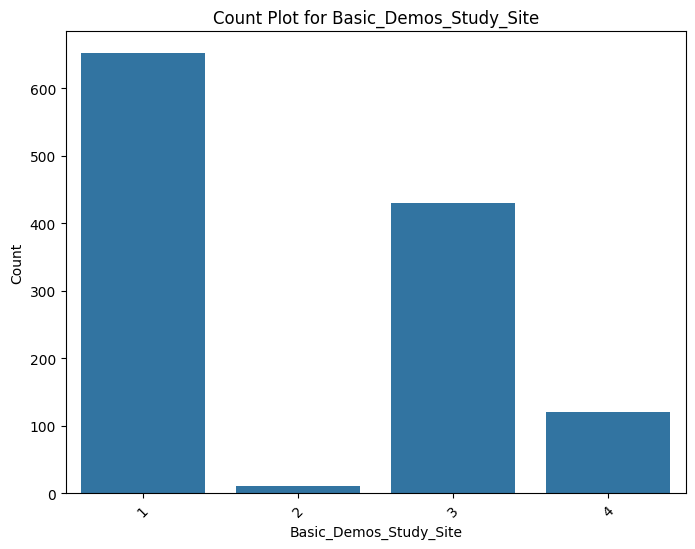

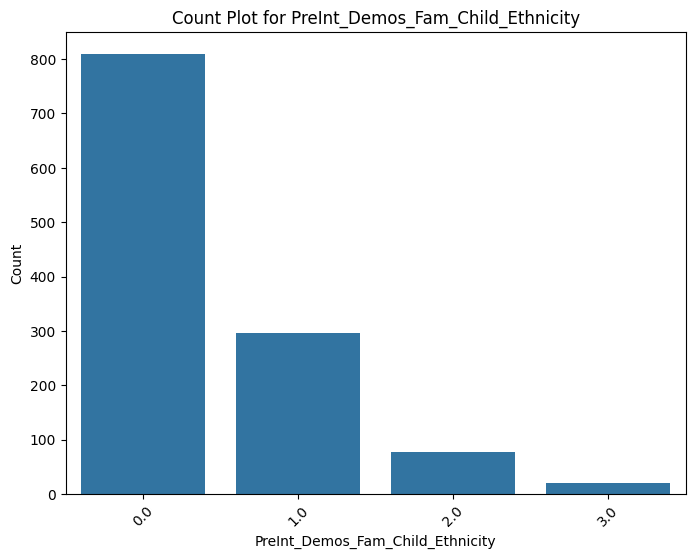

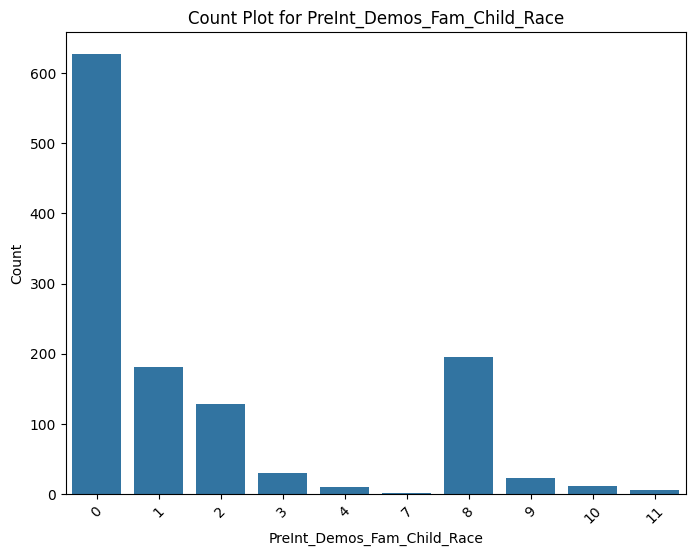

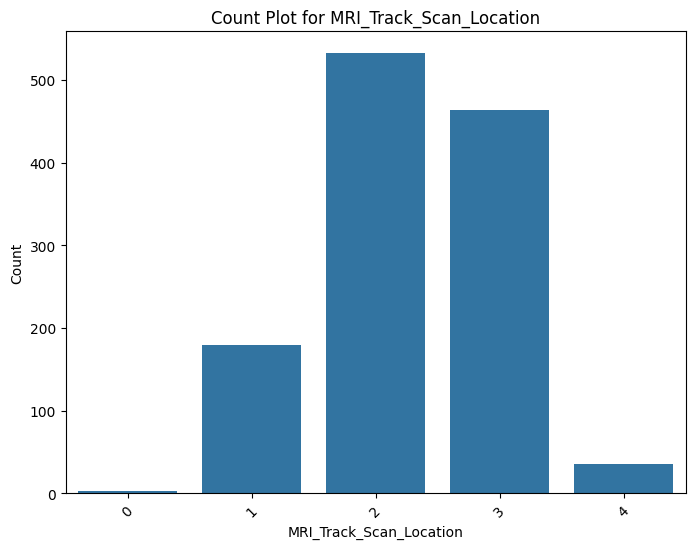

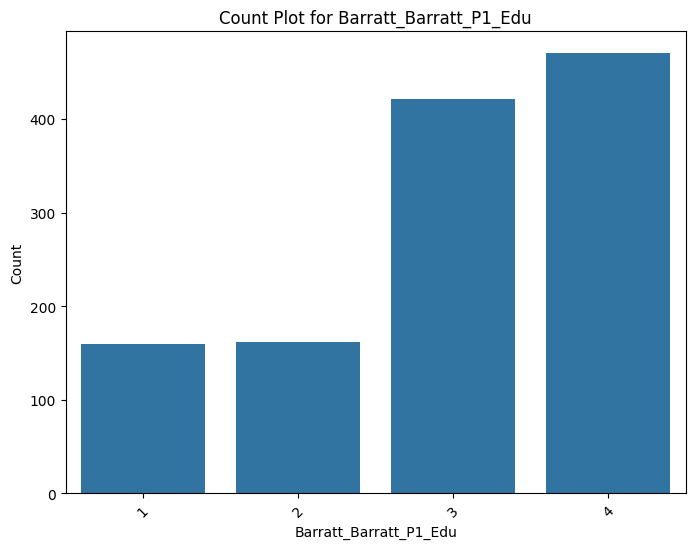

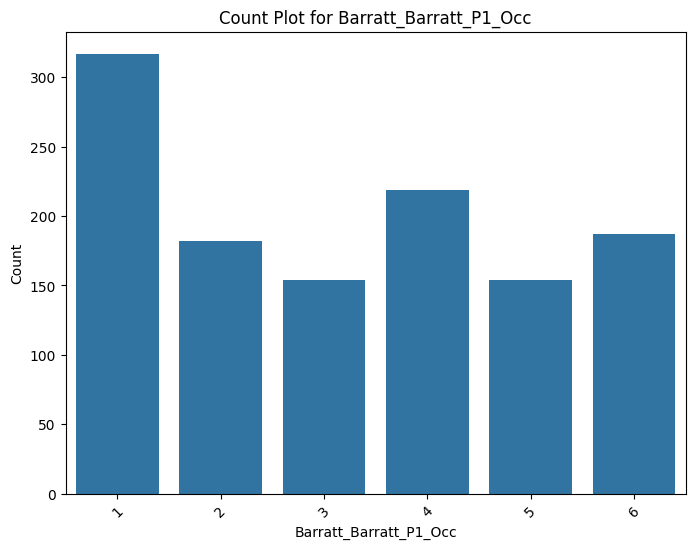

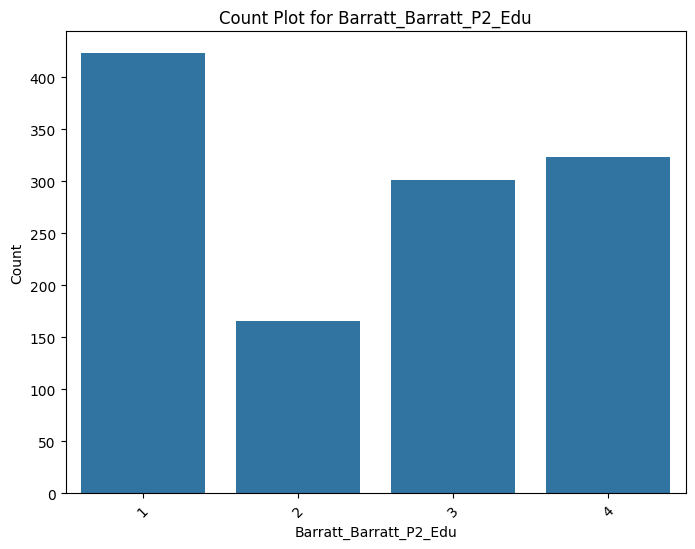

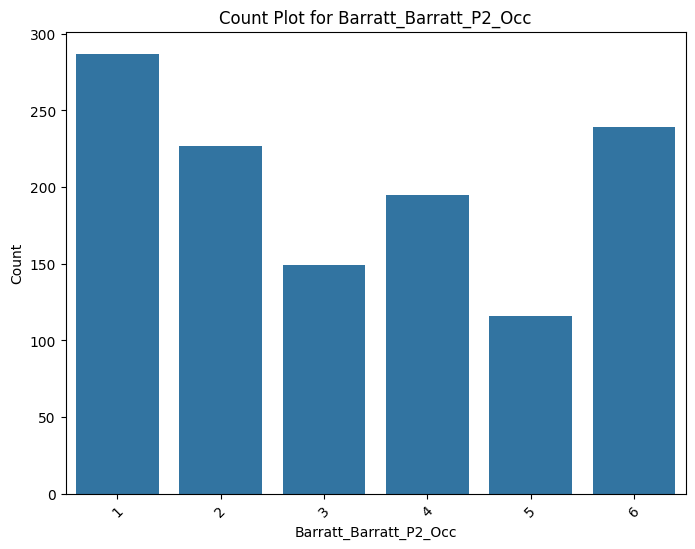

In [40]:
# Plot bar plots (count plots) for each categorical column again
categorical_cols = [col for col in metadata_b.columns if col != 'participant_id']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=metadata_b[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

💡Checking Mutual relationship between the categorical data for feature selection.

Mutual information measures the amount of information obtained about one random variable (the target) through another random variable (the feature). It is a non-parametric method that can capture both linear and non-linear relationships between variables.

In [41]:
# For Female

combined_cat = metadata_b.merge(targets, on='participant_id')

female_df = combined_cat[combined_cat['Sex_F'] == 1] # Select only female
X = female_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])  # Drop the targets
X = X.dropna(axis=1)
y = female_df['ADHD_Outcome']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False) # Top Features
print(mi_df)


                       Feature  MI Score
1       Basic_Demos_Study_Site  0.023621
5       Barratt_Barratt_P1_Occ  0.005054
0      Basic_Demos_Enroll_Year  0.002356
2  PreInt_Demos_Fam_Child_Race  0.000000
3      MRI_Track_Scan_Location  0.000000
4       Barratt_Barratt_P1_Edu  0.000000
6       Barratt_Barratt_P2_Edu  0.000000
7       Barratt_Barratt_P2_Occ  0.000000


In [42]:
# For Male

male_df = combined_cat[combined_cat['Sex_F'] == 0] # Select only Male
X = male_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])  # Drop the targets
X = X.dropna(axis=1)
y = male_df['ADHD_Outcome']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to visualize feature importance
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display top features
print(mi_df)

                       Feature  MI Score
6       Barratt_Barratt_P2_Edu  0.046921
1       Basic_Demos_Study_Site  0.032106
7       Barratt_Barratt_P2_Occ  0.014705
3      MRI_Track_Scan_Location  0.014434
0      Basic_Demos_Enroll_Year  0.013556
5       Barratt_Barratt_P1_Occ  0.008413
2  PreInt_Demos_Fam_Child_Race  0.000000
4       Barratt_Barratt_P1_Edu  0.000000


 💡 From above observation, I believe that race has nothing to do with the ADHD on both male and female.
So, dropping it.

In [43]:
metadata_b = metadata_b.drop(columns=['PreInt_Demos_Fam_Child_Race'])
metadata_b.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,1,1,0.0,1,4,6,4,6
1,CPaeQkhcjg7d,4,3,1.0,3,2,2,1,1
2,Nb4EetVPm3gs,1,1,1.0,1,3,5,1,1
3,p4vPhVu91o4b,3,3,0.0,3,2,3,3,1
4,M09PXs7arQ5E,4,3,0.0,3,2,2,1,1


### 📊 For FMRI_Matrices:

Visualizing 19,901 columns individually is unrealistic

- Took only a sample subset of columns to plot histograms
- Goal is the check if the distributions are skewed or not!


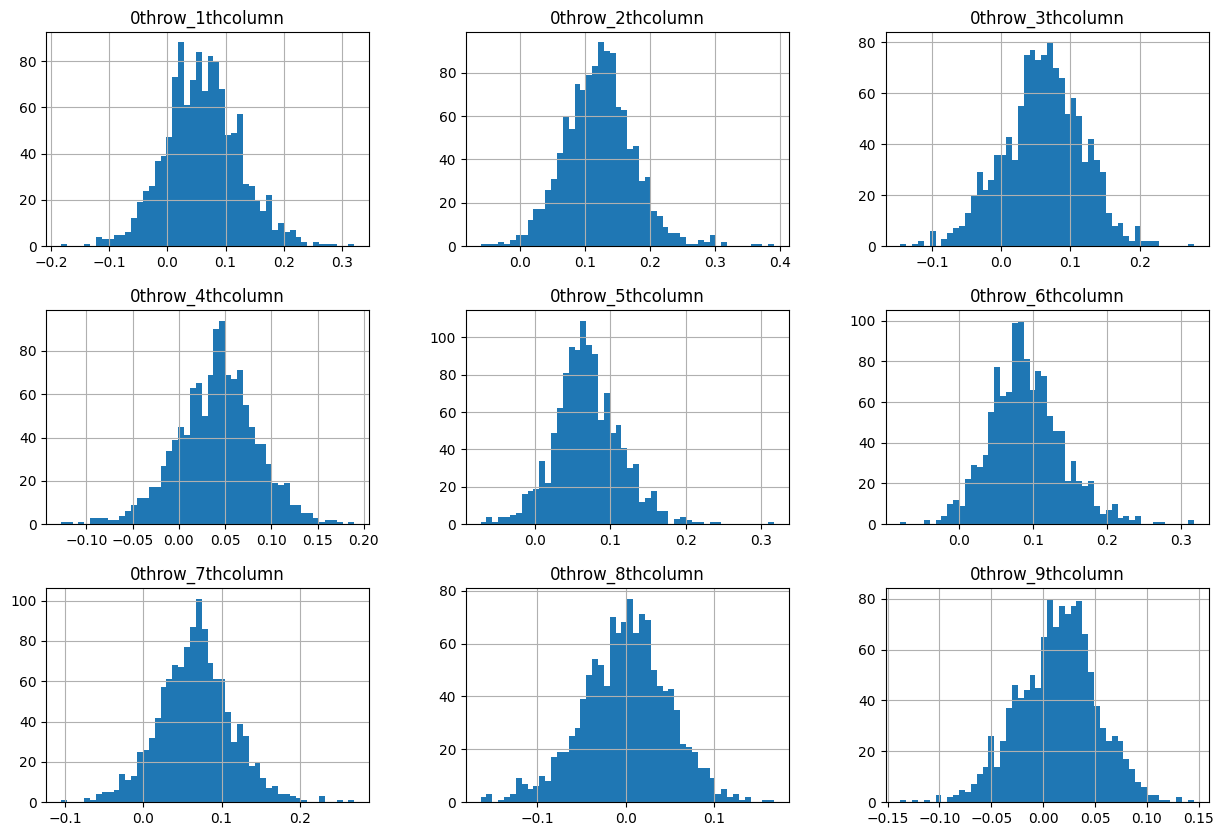

In [44]:

sample_columns = fmri_matrices.columns[1:10]  # Select first 10 fMRI features (excluding participant_id)
fmri_matrices[sample_columns].hist(figsize=(15, 10), bins=50)
plt.show()

In [45]:
fmri_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [46]:
fmri_matrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [47]:
numerical_cols = fmri_matrices.select_dtypes(include=['int64', 'float64']).columns  # Remove participant_id

skewness_values = fmri_matrices[numerical_cols].skew().sort_values()

# Categorize into Left Skewed, Right Skewed, and Normal
left_skewed = skewness_values[skewness_values < -0.5]
right_skewed = skewness_values[skewness_values > 0.5]
normal_skew = skewness_values[(skewness_values >= -0.5) & (skewness_values <= 0.5)]

# Print top 10 from each category
print("\n Top 10 Left-Skewed Features (Skewness < -0.5):")
print(left_skewed.head(10))
print(f"Total: {len(left_skewed)}")

print("\n Top 10 Right-Skewed Features (Skewness > 0.5):")
print(right_skewed.tail(10))  # Using tail() to get highest values first
print(f"Total: {len(right_skewed)}")

print("\n Top 10 Normally Distributed Features (-0.5 <= Skewness <= 0.5):")
print(normal_skew.sample(10))  # Random 10 since normal ones are not ordered
print(f"Total: {len(normal_skew)}")



 Top 10 Left-Skewed Features (Skewness < -0.5):
9throw_106thcolumn    -0.681590
11throw_109thcolumn   -0.557406
10throw_108thcolumn   -0.502661
dtype: float64
Total: 3

 Top 10 Right-Skewed Features (Skewness > 0.5):
96throw_194thcolumn     0.692738
18throw_84thcolumn      0.730863
112throw_137thcolumn    0.765402
18throw_37thcolumn      0.793650
85throw_98thcolumn      0.825043
7throw_9thcolumn        0.858482
9throw_108thcolumn      0.876481
26throw_136thcolumn     0.947537
106throw_108thcolumn    1.023073
74throw_105thcolumn     1.024060
dtype: float64
Total: 35

 Top 10 Normally Distributed Features (-0.5 <= Skewness <= 0.5):
42throw_126thcolumn     0.036501
46throw_101thcolumn     0.075385
42throw_168thcolumn    -0.201504
105throw_127thcolumn   -0.005855
12throw_114thcolumn     0.007629
83throw_132thcolumn    -0.192872
74throw_150thcolumn     0.057209
98throw_130thcolumn    -0.263645
4throw_157thcolumn      0.035118
0throw_63thcolumn       0.068462
dtype: float64
Total: 19862


💡 Most of the features 19862 features are normally distribute and only 35 Right Skew and 3 Left skew are found.

- Based on this finding, I believe it is unnecessy to do extra transformation for the model training.

## 3️⃣ Merging and Splitting Data for Training & Testing


✅ Steps:
- Combine the dataset using the participant_id
- Separate features and target
- Train-test split
- Clean the data for missing values.
- Set stratify!

In [48]:
data = metadata_a.merge(metadata_b, on='participant_id', how='inner')
data = data.merge(fmri_matrices, on='participant_id', how='inner')
data = data.merge(targets, on='participant_id', how='inner')

In [49]:
data.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


In [50]:
data.shape

(1213, 19927)

In [51]:
# Drop participant_id as it's not needed for modeling
data.drop(columns=['participant_id'], inplace=True)

X = data.drop(columns=['ADHD_Outcome', 'Sex_F'])  # Features
y = data[['ADHD_Outcome', 'Sex_F']]  # Targets

In [52]:
#  Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y["Sex_F"], random_state=42
)
# This will normally distribute both Male and Female to Train and Test!

- Start Cleaning the data

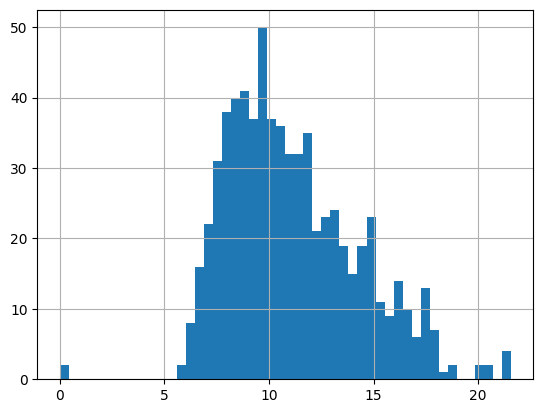

Skewness: 0.5899061305540436


In [53]:
X_train["MRI_Track_Age_at_Scan"].hist(bins=50)
plt.show()
print("Skewness:", X_train['MRI_Track_Age_at_Scan'].skew())


# If skew > 0.5 or < -0.5, it is skewed
# If data is l/R Skewed -> Medium (For better distribution)
# If data is bell shaped -> Mean


- Having age 0 with ADHD is not a valid data.
- I blieve it is a data recording error and it would mean more to set it to age 5 as this is the mininum age.

In [54]:
X_train["MRI_Track_Age_at_Scan"] = X_train["MRI_Track_Age_at_Scan"].apply(lambda x: 5 if x <= 5 else x) # if less than 5, set 5

print("Before MRI_Track_Age_at_Scan missing count:", X_train['MRI_Track_Age_at_Scan'].isnull().sum())
print("Before PreInt_Demos_Fam_Child_Ethnicity missing count:", X_train['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())

# Fill missing values in Metadata A (Quantitative)
X_train['MRI_Track_Age_at_Scan'] = X_train['MRI_Track_Age_at_Scan'].fillna(metadata_a['MRI_Track_Age_at_Scan'].median())

# Fill mdissing values in Metadata B (Categorical)
X_train['PreInt_Demos_Fam_Child_Ethnicity'] = X_train['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3.0) # Filling with unkown float type

print("MRI_Track_Age_at_Scan missing count:", X_train['MRI_Track_Age_at_Scan'].isnull().sum())
print("PreInt_Demos_Fam_Child_Ethnicity missing count:", X_train['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())


Before MRI_Track_Age_at_Scan missing count: 286
Before PreInt_Demos_Fam_Child_Ethnicity missing count: 11
MRI_Track_Age_at_Scan missing count: 0
PreInt_Demos_Fam_Child_Ethnicity missing count: 0


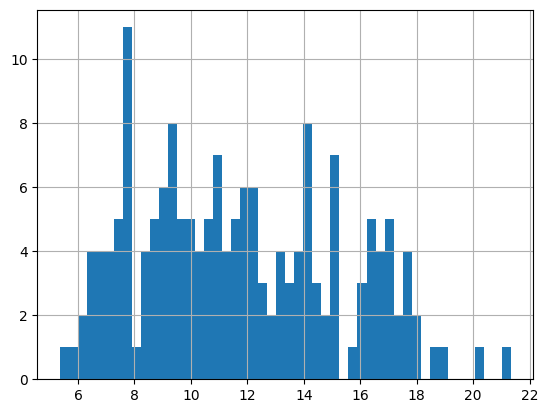

Skewness: 0.3377865613277439


In [55]:
X_test["MRI_Track_Age_at_Scan"].hist(bins=50)
plt.show()
print("Skewness:", X_test['MRI_Track_Age_at_Scan'].skew())

# If skew > 0.5 or < -0.5, it is skewed
# If data is l/R Skewed -> Medium (For better distribution)
# If data is bell shaped -> Mean

In [56]:
X_test["MRI_Track_Age_at_Scan"] = X_test["MRI_Track_Age_at_Scan"].apply(lambda x: 5 if x <= 5 else x)

print("Before MRI_Track_Age_at_Scan missing count:", X_test['MRI_Track_Age_at_Scan'].isnull().sum())
print("Before PreInt_Demos_Fam_Child_Ethnicity missing count:", X_test['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())

# Fill missing values in Metadata A (Quantitative)
X_test['MRI_Track_Age_at_Scan'] = X_test['MRI_Track_Age_at_Scan'].fillna(metadata_a['MRI_Track_Age_at_Scan'].mean())

# Fill mdissing values in Metadata B (Categorical)
X_test['PreInt_Demos_Fam_Child_Ethnicity'] = X_test['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3.0) # Filling with unkown float type

print("MRI_Track_Age_at_Scan missing count:", X_test['MRI_Track_Age_at_Scan'].isnull().sum())
print("PreInt_Demos_Fam_Child_Ethnicity missing count:", X_test['PreInt_Demos_Fam_Child_Ethnicity'].isnull().sum())


Before MRI_Track_Age_at_Scan missing count: 74
Before PreInt_Demos_Fam_Child_Ethnicity missing count: 0
MRI_Track_Age_at_Scan missing count: 0
PreInt_Demos_Fam_Child_Ethnicity missing count: 0


In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((970, 19924), (243, 19924), (970, 2), (243, 2))

Applying PCA to reduce the data into fewer Dimensional Plane.

### Standard Scaling for PCA

In [58]:
# Standardize the Data for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Checking PCA Varience before fitting components.

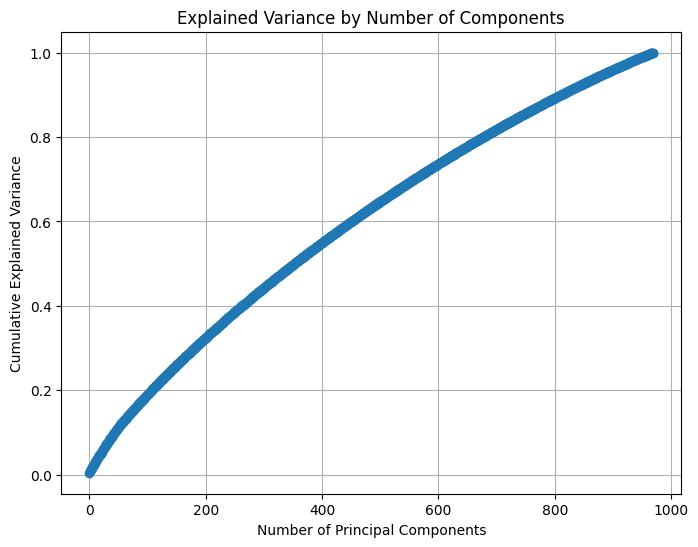

In [59]:
# PCA Variance Explained Visualization
explained_variance = PCA().fit(X_train_scaled).explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

According to the graph, 95% of varience is obained around 800 dimensions.

In [60]:
pca_testing = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca_testing.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # +1 since index starts at 0

print(f"Optimal number of components to retain 95% variance: {optimal_components}")

Optimal number of components to retain 95% variance: 886


In [61]:
pca_testing = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca_testing.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.80) + 1  # +1 since index starts at 0

print(f"Optimal number of components to retain 80% variance: {optimal_components}")
# retain 85% variance: 743
# retain 80% variance: 678

Optimal number of components to retain 80% variance: 678


### Applying PCA
Lets evaluate the model with 80% of the feautres.

In [62]:
pca = PCA(n_components=678)  # Use optimal number later
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [81]:
X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((970, 678), (243, 678), (970, 2), (243, 2))

### Applying UMAP to visualize the High Dimensional data

Uniform Manifold Approximation and Projection (UMAP) is a technique for reducing high-dimensional data to two or three dimensions.

- UMAP estimates the topology of high-dimensional data
- UMAP uses this information to construct a low-dimensional representation
- UMAP places similar cells together and puts different cells further apart

Chose this method as it is Fast & captures structure well.

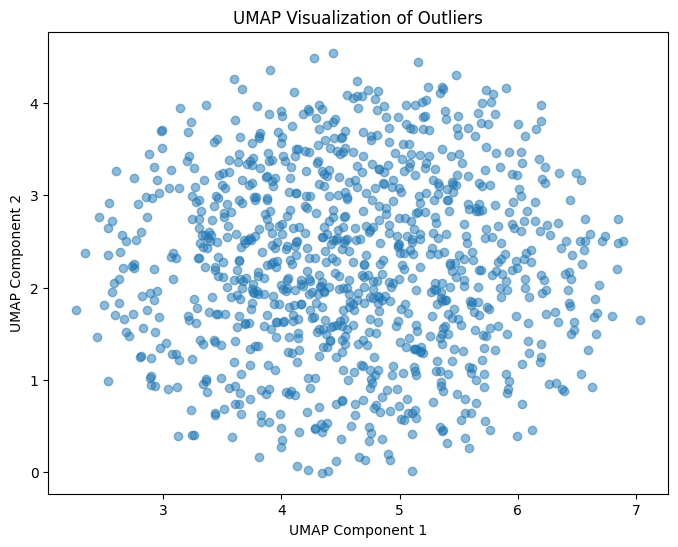

In [63]:
# Reduce 678 components to 2D using UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train_pca)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualization of Outliers")
plt.show()


### Applying DBSCAN to check the outliers
Use the UMAP to identify outliers in the data with DBSCAN!

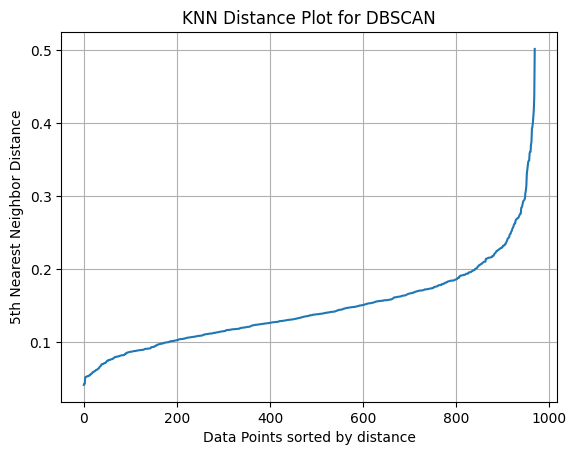

In [64]:
# Find the 5th nearest neighbor (min_samples = 5 is common)
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_umap)  # Use UMAP-reduced data
distances, indices = nbrs.kneighbors(X_umap)

# Sort and plot the distances to find the "elbow" point
distances = np.sort(distances[:, 4])  # 5th nearest neighbor
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("KNN Distance Plot for DBSCAN")
plt.grid(True)
plt.show()

Why k=5?
- In DBSCAN, the eps parameter determines how close points need to be to form a cluster. To find the optimal eps, we use the k-nearest neighbors (KNN) distance plot, where we sort and plot the distances of each point's k-th nearest neighbor.
- According to the graph, by using elbow method, we can set the eps value to around 0.2 and 0.3

DBSCAN
- Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [77]:


eps_value = 0.27  # Elbow Method
min_samples_values = [3, 4, 5, 6, 7, 8, 9, 10]

best_score = -1
best_min_samples = None
best_labels = None

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples).fit(X_umap)
    labels = dbscan.labels_

    # Ignore silhouette score for cases where all points are one cluster (-1 = noise)
    if len(set(labels)) > 1:
        score = silhouette_score(X_umap, labels)
        print(f"min_samples={min_samples}, Silhouette Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_min_samples = min_samples
            best_labels = labels

print(f"Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.4f}")

min_samples=3, Silhouette Score: 0.0776
min_samples=4, Silhouette Score: 0.2970
min_samples=5, Silhouette Score: 0.2970
min_samples=6, Silhouette Score: 0.3005
min_samples=7, Silhouette Score: 0.2951
min_samples=8, Silhouette Score: 0.2902
min_samples=9, Silhouette Score: 0.2801
min_samples=10, Silhouette Score: 0.1194
Best min_samples: 6, Best Silhouette Score: 0.3005


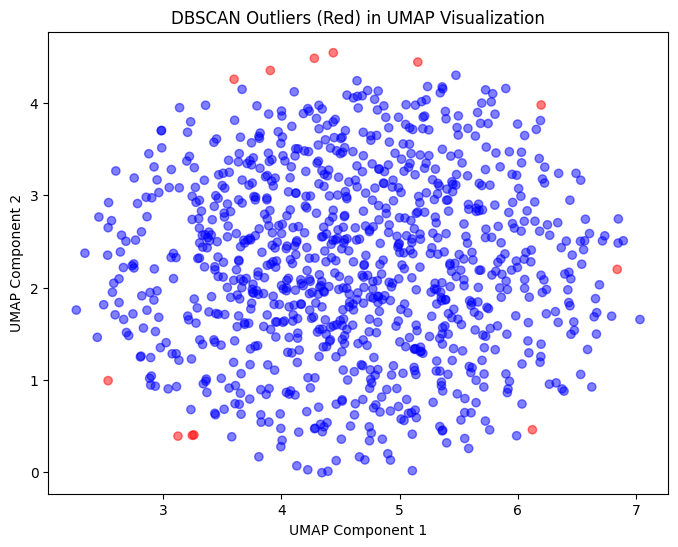

In [78]:
# Applying DBSCAN with optimal parameters
dbscan = DBSCAN(eps=eps_value, min_samples=best_min_samples).fit(X_umap)
labels = dbscan.labels_

# Color mapping: Outliers (-1) in red, clusters in blue
colors = ['red' if label == -1 else 'blue' for label in labels]

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors, alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("DBSCAN Outliers (Red) in UMAP Visualization")
plt.show()


The datapoints are closely plaecd as silhouette Score is around 0.3. Need to confirm if this approach is good for removing outliers

In [79]:
# Filter out outliers (label == -1)

outlier_mask = labels != -1  # Create a mask for non-outliers
X_umap_cleaned = X_umap[outlier_mask]  # Keep only non-outliers

# Remove outliers in Train
X_train_cleaned = X_train_pca[outlier_mask]
y_train_cleaned = y_train.iloc[outlier_mask]

In [82]:
X_train_cleaned.shape, X_test_pca.shape, y_train_cleaned.shape, y_test.shape

((958, 678), (243, 678), (958, 2), (243, 2))

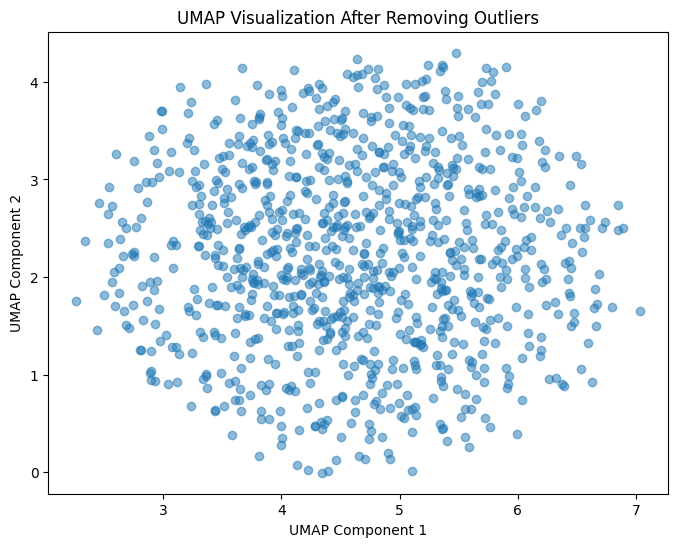

In [80]:
# Scatter plot of cleaned data without outliers

plt.figure(figsize=(8, 6))
plt.scatter(X_umap_cleaned[:, 0], X_umap_cleaned[:, 1], alpha=0.5)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualization After Removing Outliers")
plt.show()

Now, since the outliers are removed, I can try modeling. (Need feedback on the approach)
- if PCA component is changed, must change the parameter of DBSCAN as well.

In [83]:
X_train_cleaned.shape, X_test_pca.shape, y_train_cleaned.shape, y_test.shape

((958, 678), (243, 678), (958, 2), (243, 2))

# 📌 Model Training
- Choice of Model to implement for training is not finalized yet.
- Just exploring for the Stage - 2

## SVM (Support Vector Machine)

In [84]:
# Tune SVM Hyperparameters using Grid Search

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}
# param_grid = {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cleaned, y_train_cleaned['ADHD_Outcome'])

best_svm = grid_search.best_estimator_
print(f"Best SVM Parameters: {grid_search.best_params_}")
# Best SVM Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
# Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [85]:
# Evaluate Model on Test Data
y_pred = best_svm.predict(X_test_pca)
accuracy = accuracy_score(y_test['ADHD_Outcome'], y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
# Model Accuracy: 0.7119
# Model Accuracy: 0.7366

Model Accuracy: 0.7366


In [86]:
print(classification_report(y_test['ADHD_Outcome'], y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.74      1.00      0.85       179

    accuracy                           0.74       243
   macro avg       0.37      0.50      0.42       243
weighted avg       0.54      0.74      0.62       243



Overall Accuracy for SVM

- The overall accuracy is 74%, but this is misleading because the model is biased toward class 1 and completely failed to predict class 0.
- Can try oversampling (e.g., SMOTE) or undersampling to balance the dataset.

The potiential issuce i think is because of Imbalanced Dataset:
- The dataset is imbalanced, with 64 samples in class 0 and 179 samples in class 1.
- This maybe the reaseon why the  model is favoring the majority class (class 1) and ignoring the minority class (class 0).

---

In [87]:
X_train_cleaned.shape, X_test_pca.shape, y_train_cleaned.shape, y_test.shape

((958, 678), (243, 678), (958, 2), (243, 2))

## Ridge Linear Regression (L2)

In [88]:
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # testing values from 0.0001 to 10000
}

# ridge_param_grid= {'alpha': 100}

ridge = Ridge()

# Perform Grid Search
ridge_grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model using the cleaned training data
ridge_grid_search.fit(X_train_cleaned, y_train_cleaned['ADHD_Outcome'])

print("Best Ridge Parameters:", ridge_grid_search.best_params_)
print("Best Score:", -ridge_grid_search.best_score_)  # Converting back from negative MSE


Best Ridge Parameters: {'alpha': 100}
Best Score: 2.454857749593752


In [89]:
# Train final model with best parameters
best_ridge = ridge_grid_search.best_estimator_

# Make predictions on test set
ridge_predictions = best_ridge.predict(X_test_pca)


In [90]:
# Calculate and print performance metrics


ridge_mse = mean_squared_error(y_test['ADHD_Outcome'], ridge_predictions)
ridge_r2 = r2_score(y_test['ADHD_Outcome'], ridge_predictions)

print(f"\nTest Set Performance:")
print(f"MSE: {ridge_mse:.4f}")
print(f"R2 Score: {ridge_r2:.4f}")

# Best Ridge Parameters: {'alpha': 100}
# Best Score: 0.21154833989009497

# Test Set Performance:
# MSE: 0.1988
# R2 Score: -0.0246


# Best Ridge Parameters: {'alpha': 100}
# Best Score: 2.454857749593752
# Test Set Performance:
# MSE: 0.1939
# R2 Score: 0.0006


Test Set Performance:
MSE: 0.1939
R2 Score: 0.0006


In [91]:
ridge_predictions_binary = (ridge_predictions >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test['ADHD_Outcome'], ridge_predictions_binary)
print(f"Ridge Accuracy: {accuracy:.4f}")

# Get detailed classification report
print("\nClassification Report:")
print(classification_report(y_test['ADHD_Outcome'], ridge_predictions_binary))

# Ridge Accuracy: 0.7366
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.00      0.00      0.00        64
#            1       0.74      1.00      0.85       179

#     accuracy                           0.74       243
#    macro avg       0.37      0.50      0.42       243
# weighted avg       0.54      0.74      0.62       243

# Ridge Accuracy: 0.7366

# Classification Report:
#               precision    recall  f1-score   support

#            0       0.50      0.12      0.20        64
#            1       0.75      0.96      0.84       179

#     accuracy                           0.74       243
#    macro avg       0.63      0.54      0.52       243
# weighted avg       0.69      0.74      0.67       243

Ridge Accuracy: 0.7366

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.12      0.20        64
           1       0.75      0.96      0.84       179

    accuracy                           0.74       243
   macro avg       0.63      0.54      0.52       243
weighted avg       0.69      0.74      0.67       243



---

In [93]:
X_train_cleaned.shape, X_test_pca.shape, y_train_cleaned.shape, y_test.shape

((958, 678), (243, 678), (958, 2), (243, 2))

## XGBoost

In [96]:
gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],  # Focus on a moderate and high number of trees
    'learning_rate': [0.1, 0.2],  # Common learning rates
    'max_depth': [3, 5],  # Moderate depth to balance complexity and overfitting
    'min_samples_split': [2, 5],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples at a leaf node
}

In [95]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='accuracy',  # can use 'f1', 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_cleaned, y_train_cleaned)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weight=None)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 1515, in _encode_y
    encoded_y_int = label_encoder.fit_transform(y)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py", line 110, in fit_transform
    y = column_or_1d(y, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1485, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (766, 2) instead.

--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 669, in fit
    y = self._encode_y(y=y, sample_weight=None)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py", line 1515, in _encode_y
    encoded_y_int = label_encoder.fit_transform(y)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py", line 110, in fit_transform
    y = column_or_1d(y, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1485, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (767, 2) instead.


In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_pca)

In [ ]:
# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

---

# 📌 Next Steps
- SHAP or LIME for model explainations.

# Thank you for taking the time to give feedback!

Best Regards
- Tun Ye Minn